#**TEXT CLASSIFICATION WITH TF-IDF EXTRACTED FEATURES**

**Imports**

In [1]:
import pandas as pd

from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics, neighbors
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


**Google Drive Mountain**

In [2]:
# Code to mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/processed_data.csv")
df.head()

,CATEGORY,CONTENT,PROCESSED_CONTENT
0,business,WASHINGTON — In an effort to deliver on Presid...,washington effort deliver president obama pled...
1,business,Latest Articles\n\nStarving for Income? Safe M...,latest article starving income safe money stoc...
2,business,Nigeria has overtaken South Africa as Africa's...,nigeria overtaken south africa africa largest ...
3,business,"Receiving Wide Coverage ...\n\nStress Tests, P...",receiving wide coverage stress test part ii ci...
4,business,The dollar steadied on Friday after a signific...,dollar steadied friday significant rise u prod...


**Encoding the labels "CATEGORY"**

In [4]:
label_encoder = preprocessing.LabelEncoder()
df['CATEGORY'] = label_encoder.fit_transform(df['CATEGORY'])

**Sampling the Data and Plotting their Distribution**

In [6]:
df["CATEGORY"].value_counts()

,count
CATEGORY,
0,6554
1,6554
2,6554
3,6554


**Train/test split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['PROCESSED_CONTENT'], df['CATEGORY'], test_size=0.2, random_state=42)

**Feature Extractions Using Bag of Words [BoW]**

In [8]:
#Bag of words
tfidvectorizer = TfidfVectorizer(min_df=2,
                                 ngram_range=(2,2),
                                 smooth_idf=True,
                                 use_idf=True)
train_features = tfidvectorizer.fit_transform(X_train)
test_features = tfidvectorizer.transform(X_test)

**Support Vector Machines**

Support Vector Machine using TF-IDF

Accuracy:  96.37681159420289 

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1335
           1       0.98      0.98      0.98      1326
           2       0.97      0.96      0.97      1272
           3       0.95      0.97      0.96      1311

    accuracy                           0.96      5244
   macro avg       0.96      0.96      0.96      5244
weighted avg       0.96      0.96      0.96      5244



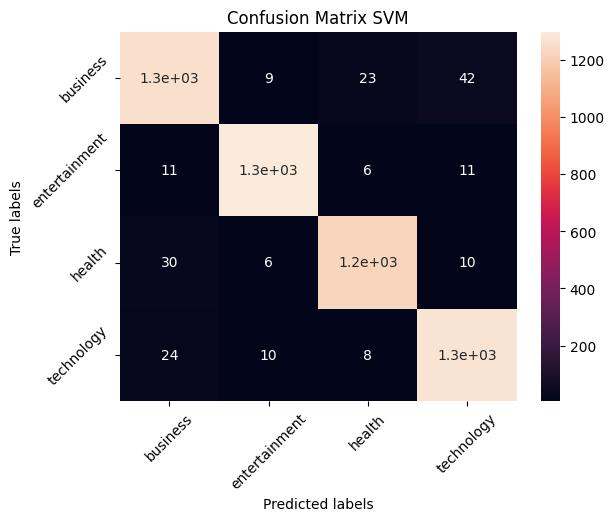

In [9]:
#Support Vector Machines

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_features,y_train)
predictions_SVM = SVM.predict(test_features)

print("Support Vector Machine using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_SVM, y_test)*100,"\n")
print("Classification Report\n")
print(classification_report(y_test ,predictions_SVM))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_SVM)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix SVM');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**Logistic Regression**

Logistic Regression using TF-IDF

Accuracy:  95.78565980167811 

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1335
           1       0.97      0.98      0.98      1326
           2       0.97      0.95      0.96      1272
           3       0.94      0.97      0.95      1311

    accuracy                           0.96      5244
   macro avg       0.96      0.96      0.96      5244
weighted avg       0.96      0.96      0.96      5244



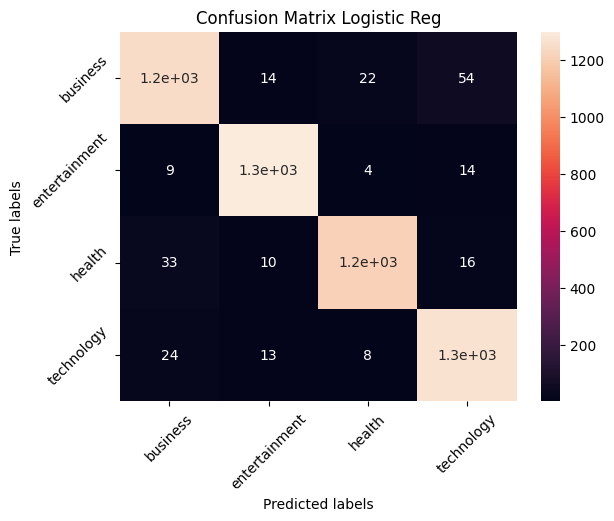

In [10]:
#Logistic Regression

logRegModel = LogisticRegression()
logRegModel.fit(train_features, y_train)
predictions_lr = logRegModel.predict(test_features)

print("Logistic Regression using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_lr, y_test)*100,"\n")
print("Classification Report\n")
print(classification_report(y_test,predictions_lr))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_lr)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Logistic Reg');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**Naive Bayes**

MultiNomial Naive Bayes using TF-IDF

Accuracy:  95.30892448512586 

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1335
           1       0.97      0.98      0.97      1326
           2       0.96      0.95      0.96      1272
           3       0.93      0.96      0.94      1311

    accuracy                           0.95      5244
   macro avg       0.95      0.95      0.95      5244
weighted avg       0.95      0.95      0.95      5244



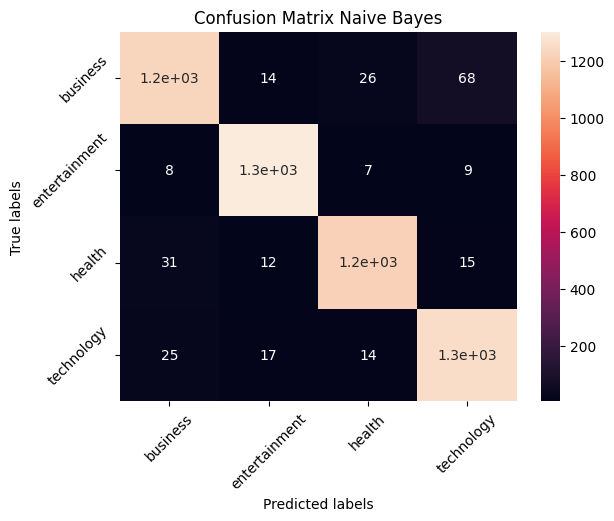

In [11]:
#Naive Bayes
mnb = MultinomialNB()
mnb.fit(train_features,y_train)
predictions_mnb = mnb.predict(test_features)

print("MultiNomial Naive Bayes using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_mnb, y_test)*100,"\n")
print("Classification Report\n")
print(classification_report(y_test,predictions_mnb))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_mnb)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Naive Bayes');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**Random Forest**

Random Forest using TF-IDF

Accuracy:  90.255530129672 

Classification Report

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1335
           1       0.95      0.93      0.94      1326
           2       0.95      0.89      0.92      1272
           3       0.95      0.84      0.89      1311

    accuracy                           0.90      5244
   macro avg       0.91      0.90      0.90      5244
weighted avg       0.91      0.90      0.90      5244



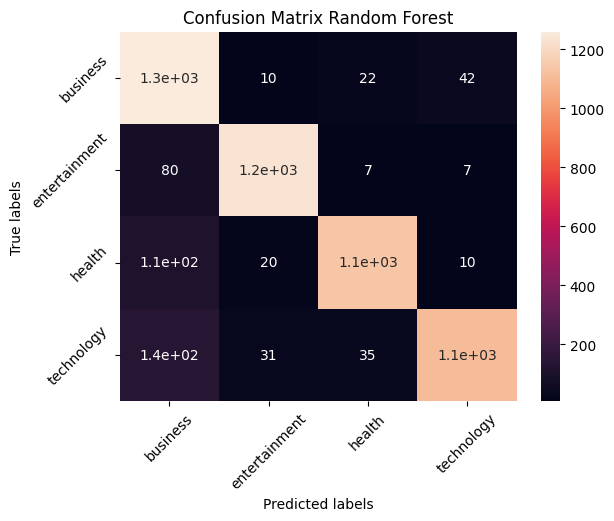

In [12]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_features,y_train)
predictions_rfc = rfc.predict(test_features)

print("Random Forest using TF-IDF\n")
print("Accuracy: ",accuracy_score(predictions_rfc, y_test)*100,"\n")
print("Classification Report\n")
print(classification_report(y_test,predictions_rfc))


#Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions_rfc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix Random Forest');
ax.xaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);
ax.yaxis.set_ticklabels(['business', 'entertainment','health','technology'],rotation =45);

**K-Nearest-Neigbour**

In [13]:
def knn(p,n,vector_type, metric=None):

    X_train, X_test, y_train, y_test = train_test_split(df['PROCESSED_CONTENT'], df['CATEGORY'], test_size=0.2, random_state=42)

    knn = neighbors.KNeighborsClassifier(n_neighbors=n, weights='distance', algorithm='auto', metric=metric, p=p, n_jobs=1)

    if vector_type == 'BoW':
        vectorizer = CountVectorizer(analyzer='word', input='content')
        train_vec = vectorizer.fit_transform(X_train)
        test_vec = vectorizer.transform(X_test)

    elif vector_type == 'tfidf':
        vectorizer =  TfidfVectorizer(analyzer='word', input='content')
        train_vec = vectorizer.fit_transform(X_train)
        test_vec = vectorizer.transform(X_test)



    knn.fit(train_vec, y_train)
    predicted = knn.predict(test_vec)
    acc = metrics.accuracy_score(y_test, predicted)
    print('Accuracy: KNN with {}, neighbors: {}, distance metric: {}  = {}'.format(vector_type, n,metric, str(acc * 100) + '%'))

**Cosine Similarities**

In [14]:
for n_neighbor in range(2,8,1):
    knn(2,n_neighbor,'tfidf','cosine')

Accuracy: KNN with tfidf, neighbors: 2, distance metric: cosine  = 96.62471395881008%
Accuracy: KNN with tfidf, neighbors: 3, distance metric: cosine  = 96.81540808543096%
Accuracy: KNN with tfidf, neighbors: 4, distance metric: cosine  = 96.83447749809307%
Accuracy: KNN with tfidf, neighbors: 5, distance metric: cosine  = 96.66285278413424%
Accuracy: KNN with tfidf, neighbors: 6, distance metric: cosine  = 96.79633867276888%
Accuracy: KNN with tfidf, neighbors: 7, distance metric: cosine  = 96.66285278413424%


**Euclidean**

In [15]:
for n_neighbor in range(2,8,1):
    knn(2,n_neighbor,'tfidf','euclidean')

Accuracy: KNN with tfidf, neighbors: 2, distance metric: euclidean  = 96.62471395881008%
Accuracy: KNN with tfidf, neighbors: 3, distance metric: euclidean  = 96.77726926010679%
Accuracy: KNN with tfidf, neighbors: 4, distance metric: euclidean  = 96.77726926010679%
Accuracy: KNN with tfidf, neighbors: 5, distance metric: euclidean  = 96.62471395881008%
Accuracy: KNN with tfidf, neighbors: 6, distance metric: euclidean  = 96.7581998474447%
Accuracy: KNN with tfidf, neighbors: 7, distance metric: euclidean  = 96.64378337147215%
